# Ex04 - Filtragem de Imagens

 convolução discreta é uma ferramenta utilizada para construir qualquer filtro linear ou de deslocamento. 

**Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

**Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Um dos filtros aguçantes mais comum é o Sobel (https://en.wikipedia.org/wiki/Sobel_operator).

Veja mais no notebook sobre [Filtragem no domínio espacial](07 Filtragem no domínio espacial.ipynb)

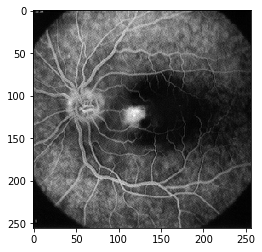

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
plt.imshow(f,cmap='gray')

### Exercício 1

Entenda o uso da função numpy.convolve e experimente usá-la para entender o filtro da média. Sugestões:
- comece com uma imagem numérica pequena e depois use a imagem da retina
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes
- varie também o modos da função, explicando as diferenças encontradas
- compare os resultados obtidos pela função numpy.convolve com a filtragem usando a função conv da toolbox ia898

In [2]:
import sys, os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
import scipy.signal as sc

### Ex04.1 Matrix pequena para testar a convolução:

In [3]:
f_test = np.random.randint(1, 3, (4, 4))
# f_test = np.ones((5,5))
print(f_test)

[[2 2 1 1]
 [2 1 1 2]
 [2 2 2 1]
 [1 1 2 2]]


#### Criando o filtro da média

In [4]:
s = 3
kernel_ex1 = np.ones((s, s))/s**2
print(kernel_ex1)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Pode-se perceber, que o modo 'full' mantém a borda utilizada para o tratamento de borda da convolução, enquanto o modo 'same' a elimina após a convolução.  
O modo 'valid' apenas mantém os valores que não foram afetados pela borda!  
Também é possível selecionar se o valor da borda será:
* Replicado: com a opção boundary = 'symm';
* Preenchido com um valor específico: com as opções boundary = 'fill' e fillvalue = valor;
* Circular: com a opção boundary = 'wrap', é o exemplo do 'azulejo'
* Preenchido com zeros: opção padrão

In [5]:
filtered_test1 = sc.convolve2d(f_test, kernel_ex1, mode='full')
filtered_test2 = sc.convolve2d(f_test, kernel_ex1, mode='valid')
filtered_test3 = sc.convolve2d(f_test, kernel_ex1, mode='same', boundary='symm')
filtered_test3a = sc.convolve2d(f_test, kernel_ex1, mode='same')
filtered_test4 = ia.conv(f_test, kernel_ex1)

print('scipy full\n{}\n'.format(filtered_test1))
print('scipy valid\n{}\n'.format(filtered_test2))
print('scipy same symm\n{}\n'.format(filtered_test3))
print('scipy same 0\n{}\n'.format(filtered_test3a))
print('ia.conv\n{}\n'.format(filtered_test4))

scipy full
[[0.22222222 0.44444444 0.55555556 0.44444444 0.22222222 0.11111111]
 [0.44444444 0.77777778 1.         0.88888889 0.55555556 0.33333333]
 [0.66666667 1.22222222 1.66666667 1.44444444 0.88888889 0.44444444]
 [0.55555556 1.         1.55555556 1.55555556 1.11111111 0.55555556]
 [0.33333333 0.66666667 1.11111111 1.11111111 0.77777778 0.33333333]
 [0.11111111 0.22222222 0.44444444 0.55555556 0.44444444 0.22222222]]

scipy valid
[[1.66666667 1.44444444]
 [1.55555556 1.55555556]]

scipy same symm
[[1.88888889 1.55555556 1.33333333 1.22222222]
 [1.88888889 1.66666667 1.44444444 1.33333333]
 [1.55555556 1.55555556 1.55555556 1.66666667]
 [1.33333333 1.55555556 1.66666667 1.77777778]]

scipy same 0
[[0.77777778 1.         0.88888889 0.55555556]
 [1.22222222 1.66666667 1.44444444 0.88888889]
 [1.         1.55555556 1.55555556 1.11111111]
 [0.66666667 1.11111111 1.11111111 0.77777778]]

ia.conv
[[0.22222222 0.44444444 0.55555556 0.44444444 0.22222222 0.11111111]
 [0.44444444 0.77777778

### Ex04.1 Agora com a imagem:

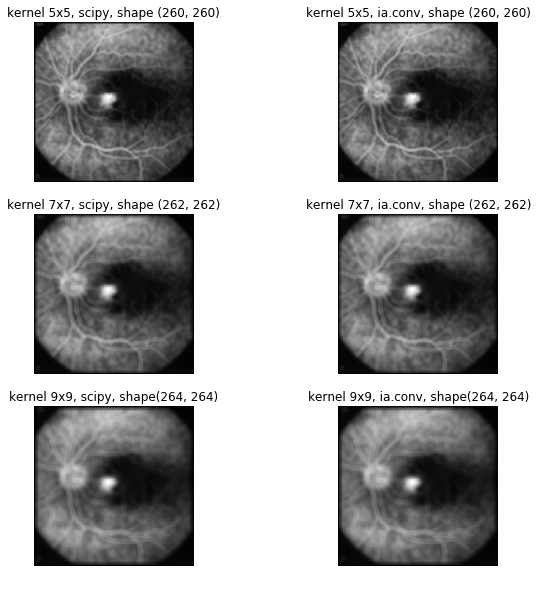

In [6]:
s1 = 5
s2 = 7
s3 = 9
kernel_ex1a = np.ones((s1, s1))/s1**2
kernel_ex1b = np.ones((s2, s2))/s1**2
kernel_ex1c = np.ones((s3, s3))/s1**2

f_filtered_ex1a = sc.convolve2d(f, kernel_ex1a)
f_filtered_ex1b = ia.conv(f, kernel_ex1a)

f_filtered_ex1c = sc.convolve2d(f, kernel_ex1b)
f_filtered_ex1d = ia.conv(f, kernel_ex1b)

f_filtered_ex1e = sc.convolve2d(f, kernel_ex1c)
f_filtered_ex1f = ia.conv(f, kernel_ex1c)

fig_ex1a = plt.figure(figsize=(10,10))

fig_ex1a.add_subplot(321).axis('off')
plt.title('kernel 5x5, scipy, shape {}'.format(f_filtered_ex1a.shape))
plt.imshow(f_filtered_ex1a, cmap='gray')

fig_ex1a.add_subplot(322).axis('off')
plt.title('kernel 5x5, ia.conv, shape {}'.format(f_filtered_ex1b.shape))
plt.imshow(f_filtered_ex1b, cmap='gray')

fig_ex1a.add_subplot(323).axis('off')
plt.title('kernel 7x7, scipy, shape {}'.format(f_filtered_ex1c.shape))
plt.imshow(f_filtered_ex1c, cmap='gray')

fig_ex1a.add_subplot(324).axis('off')
plt.title('kernel 7x7, ia.conv, shape {}'.format(f_filtered_ex1d.shape))
plt.imshow(f_filtered_ex1d, cmap='gray')

fig_ex1a.add_subplot(325).axis('off')
plt.title('kernel 9x9, scipy, shape{}'.format(f_filtered_ex1e.shape))
plt.imshow(f_filtered_ex1e, cmap='gray')

fig_ex1a.add_subplot(326).axis('off')
plt.title('kernel 9x9, ia.conv, shape{}'.format(f_filtered_ex1f.shape))
plt.imshow(f_filtered_ex1f, cmap='gray')

plt.show()

Apenas para comparação, a np.sum da diferença entre cada um (scipy vs ia)

In [7]:
print(np.sum(f_filtered_ex1a-f_filtered_ex1b))
print(np.sum(f_filtered_ex1c-f_filtered_ex1d))
print(np.sum(f_filtered_ex1e-f_filtered_ex1f))

0.0
0.0
0.0


### Ex04.1: Eu já tinha feito com numpy.convolve de uma certa forma. Por isso, vou deixar abaixo.

O numpy.convolve recebe apenas vetores como entrada, e faz a convolução 1D.  
Convoluir e fazer reshape não é uma boa solução, já que a convolução 1D não é a mesma da 2D.  
Para usar na convolução 1D:

In [21]:
s = 5
kernel1 = np.ones((s, s))/s**2
semi_filter = np.ones(s)/s
print(semi_filter)
f_test1 = np.random.randint(1, 3, (7, 7))

[0.2 0.2 0.2 0.2 0.2]


In [23]:
same = f_test1.copy().astype('float32')
full = np.convolve(f_test1.flatten(), kernel1.flatten(), 'full')

for i in range(len(f_test1)):
    same[i] = np.convolve(same[i], semi_filter, mode='same')
for i in range(len(f_test1.T)):
    same.T[i] = np.convolve(same.T[i], semi_filter, mode='same')
    
iaconv = ia.conv(f_test1, kernel1)

print('Full mode. Shape: {}\n{}\n'.format(full.shape, np.around(full, 3)))

print('Same mode. Shape:{}\n {}\n'.format(same.shape, np.around(same.reshape((7,7)), 3)))

print('ia.conv. Shape:{}\n {}\n'.format(iaconv.shape, np.around(iaconv, 3)))

Full mode. Shape: (73,)
[0.08 0.16 0.24 0.28 0.32 0.4  0.48 0.56 0.64 0.72 0.8  0.88 0.92 0.96
 1.04 1.08 1.12 1.2  1.28 1.36 1.4  1.44 1.52 1.56 1.64 1.6  1.56 1.56
 1.56 1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.64 1.68 1.68 1.72 1.72
 1.72 1.72 1.68 1.72 1.76 1.72 1.76 1.68 1.64 1.6  1.52 1.48 1.4  1.32
 1.24 1.16 1.08 1.   0.92 0.84 0.76 0.68 0.6  0.52 0.48 0.4  0.32 0.28
 0.2  0.12 0.08]

Same mode. Shape:(7, 7)
 [[0.64 0.84 1.04 1.   0.96 0.76 0.56]
 [0.8  1.08 1.32 1.28 1.24 1.   0.72]
 [1.   1.36 1.68 1.68 1.64 1.32 0.96]
 [1.   1.4  1.76 1.76 1.68 1.36 0.96]
 [0.96 1.36 1.72 1.72 1.68 1.4  1.  ]
 [0.8  1.12 1.4  1.4  1.36 1.12 0.8 ]
 [0.64 0.88 1.12 1.12 1.08 0.88 0.64]]

ia.conv. Shape:(11, 11)
 [[0.08 0.16 0.24 0.28 0.32 0.32 0.32 0.24 0.2  0.16 0.08]
 [0.16 0.32 0.48 0.6  0.72 0.68 0.64 0.48 0.36 0.24 0.12]
 [0.24 0.44 0.64 0.84 1.04 1.   0.96 0.76 0.56 0.36 0.16]
 [0.28 0.56 0.8  1.08 1.32 1.28 1.24 1.   0.72 0.48 0.24]
 [0.32 0.68 1.   1.36 1.68 1.68 1.64 1.32 0.96 0.64 0

In [24]:
f.shape

(256, 256)

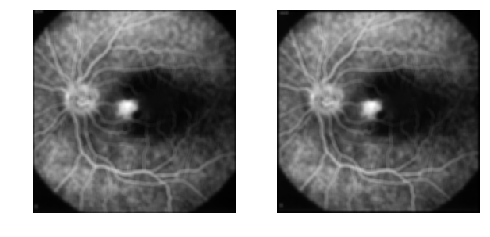

In [25]:
f_filtered = f.copy()

for i in range(len(f)):
    f_filtered[i] = np.convolve(f_filtered[i], semi_filter, mode='same')
for i in range(len(f.T)):
    f_filtered.T[i] = np.convolve(f_filtered.T[i], semi_filter, mode='same')

fig_ex1=plt.figure(figsize=(8,8))

fig_ex1.add_subplot(121).axis('off')
plt.imshow(f_filtered.reshape((256,256)), cmap='gray')

fig_ex1.add_subplot(122).axis('off')
plt.imshow(ia.conv(f, kernel1), cmap = 'gray')
plt.show()

### Exercício 2

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3)
- Faça experimentos de filtragem variando os parâmetros do filtro (tamanho da máscara do filtro, a média e o desvio padrão) 
- adicione ruído a uma imagem e depois tente remover o ruído com filtragem

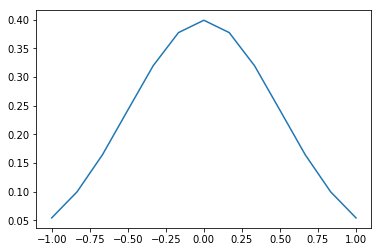

ValueError: could not broadcast input array from shape (13,1) into shape (13)

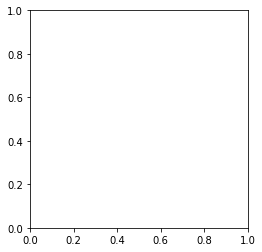

In [26]:
import numpy as np
from math import pi, exp, sqrt

def gauss_kernel(kernel_size=7, sigma=1.0, mean=0):
    
    aux = np.linspace(mean-1, mean+1, kernel_size)
    x = 1 / np.sqrt(2 * pi) * np.exp(-aux ** 2 / 2. * (sigma**2))
    y = x.reshape(len(x),1)
    xy = x * y
    plt.plot(aux, x)
    plt.show()
    return x, y, xy

plt.imshow(gauss_kernel(13, 2.0, 0), cmap='gray')
plt.show()

In [ ]:
f = ia.normalize(f)

f_noise = f.copy()

for i in range(1000):
    f_noise[np.random.choice(256), np.random.choice(256)] = 255

# for i in noise:
#     print(f_noise[i])

plt.imshow(f_noise, cmap='gray')

plt.show()

In [ ]:
kernel = gauss_kernel(5, 1.0, 0)
kernel1 = gauss_kernel(7, 2.0, 0.4)
kernel2 = gauss_kernel(9, 2.0, -.5)
kernel3 = gauss_kernel(9, 2.0, 0)

gauss = ia.normalize(ia.conv(f_noise, kernel))
gauss1 = ia.normalize(ia.conv(f_noise, kernel1))
gauss2 = ia.normalize(ia.conv(f_noise, kernel2))
gauss3 = ia.normalize(ia.conv(f_noise, kernel3))

fig=plt.figure(figsize=(15,15))

plt.subplot(321).axis('off')
plt.title('original')
plt.imshow(f_noise.reshape(256,256), cmap='gray', vmax=255)

plt.subplot(323).axis('off')
plt.imshow(gauss, cmap='gray', vmax=255)
plt.title('1')

plt.subplot(324).axis('off')
plt.imshow(gauss1, cmap='gray', vmax=255)
plt.title('2')

plt.subplot(325).axis('off')
plt.title('3')
plt.imshow(gauss2, cmap='gray', vmax=255)

plt.subplot(326).axis('off')
plt.imshow(gauss3, cmap='gray', vmax=255)
plt.title('4')

plt.show()